In [98]:
import pandas as pd

In [99]:
# Load the dataset 
df = pd.read_csv("/Users/aaqibhussain/Downloads/Customer_Data.csv")

Data Preprocessing and Exploratory Data Analysis (EDA)

In [100]:
# view the first few rows of the dataset
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [101]:
# Display information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [102]:
# Check for missing values
print(df.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [103]:
# Get summary statistics
print(df.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

Observations and Adjustments: 

Missing Values:

- MINIMUM_PAYMENTS has 313 missing values; CREDIT_LIMIT has 1.                                    
- Action: Impute both columns using the median to handle missing data effectively.

Outliers and Large Value Ranges:

- High variability in columns like BALANCE, PURCHASES, and CASH_ADVANCE indicates potential outliers.
- Action: Apply scaling (Standardization or MinMax) to normalize feature ranges.

Redundant Columns:

- CUST_ID is non-informative for clustering as it is acts as unique identifier in the dataset and is thus not needed.
- Action: Drop the CUST_ID column.

Zero Values:

- Columns like MINIMUM_PAYMENTS and CASH_ADVANCE contain zeros, possibly indicating valid cases.
- Action: Retain zero values unless specific domain knowledge suggests otherwise.

Since all columns are numerical, there is no need for categorical encoding (e.g., one-hot encoding). The dataset doesn't contain any categorical variables, so this step can be skipped.

If the clustering results are suboptimal, we may explore Principal Component Analysis (PCA) to reduce dimensionality, but initially, we’ll work with the full feature set.

**Note: We have also noticed categories like PAYMENTS, PURCHASES, and ONEOFF_PURCHASES with maximum values higher than the maximum CREDIT_LIMIT which may perhaps appear to be a discrepancy at first glance. However, in the context of credit card usage, it could be explained and might not necessarily be a data issue. We have opted to document this observation. 

In [104]:
# Fill missing values in MINIMUM_PAYMENTS and CREDIT_LIMIT with the median
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

# Check for missing values (best practise)
print(df.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [105]:
# Drop the CUST_ID column as it's not useful for clustering given that it is unique identifier
df = df.drop('CUST_ID', axis=1)

In [106]:
# Apply scaling to the features using StandardScaler
from sklearn.preprocessing import StandardScaler

# Apply scaling to the features using StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)



In [107]:
# Check if the scaling and cleaning were successful
print(scaled_df.head())

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451      

EDA: 
The first step in our analysis will be to conduct a univariate analysis. This will allow us to understand customer behaviour and the individual distribution of each feature to identify any skewness, outliers, or key patterns that may influence our clustering. 

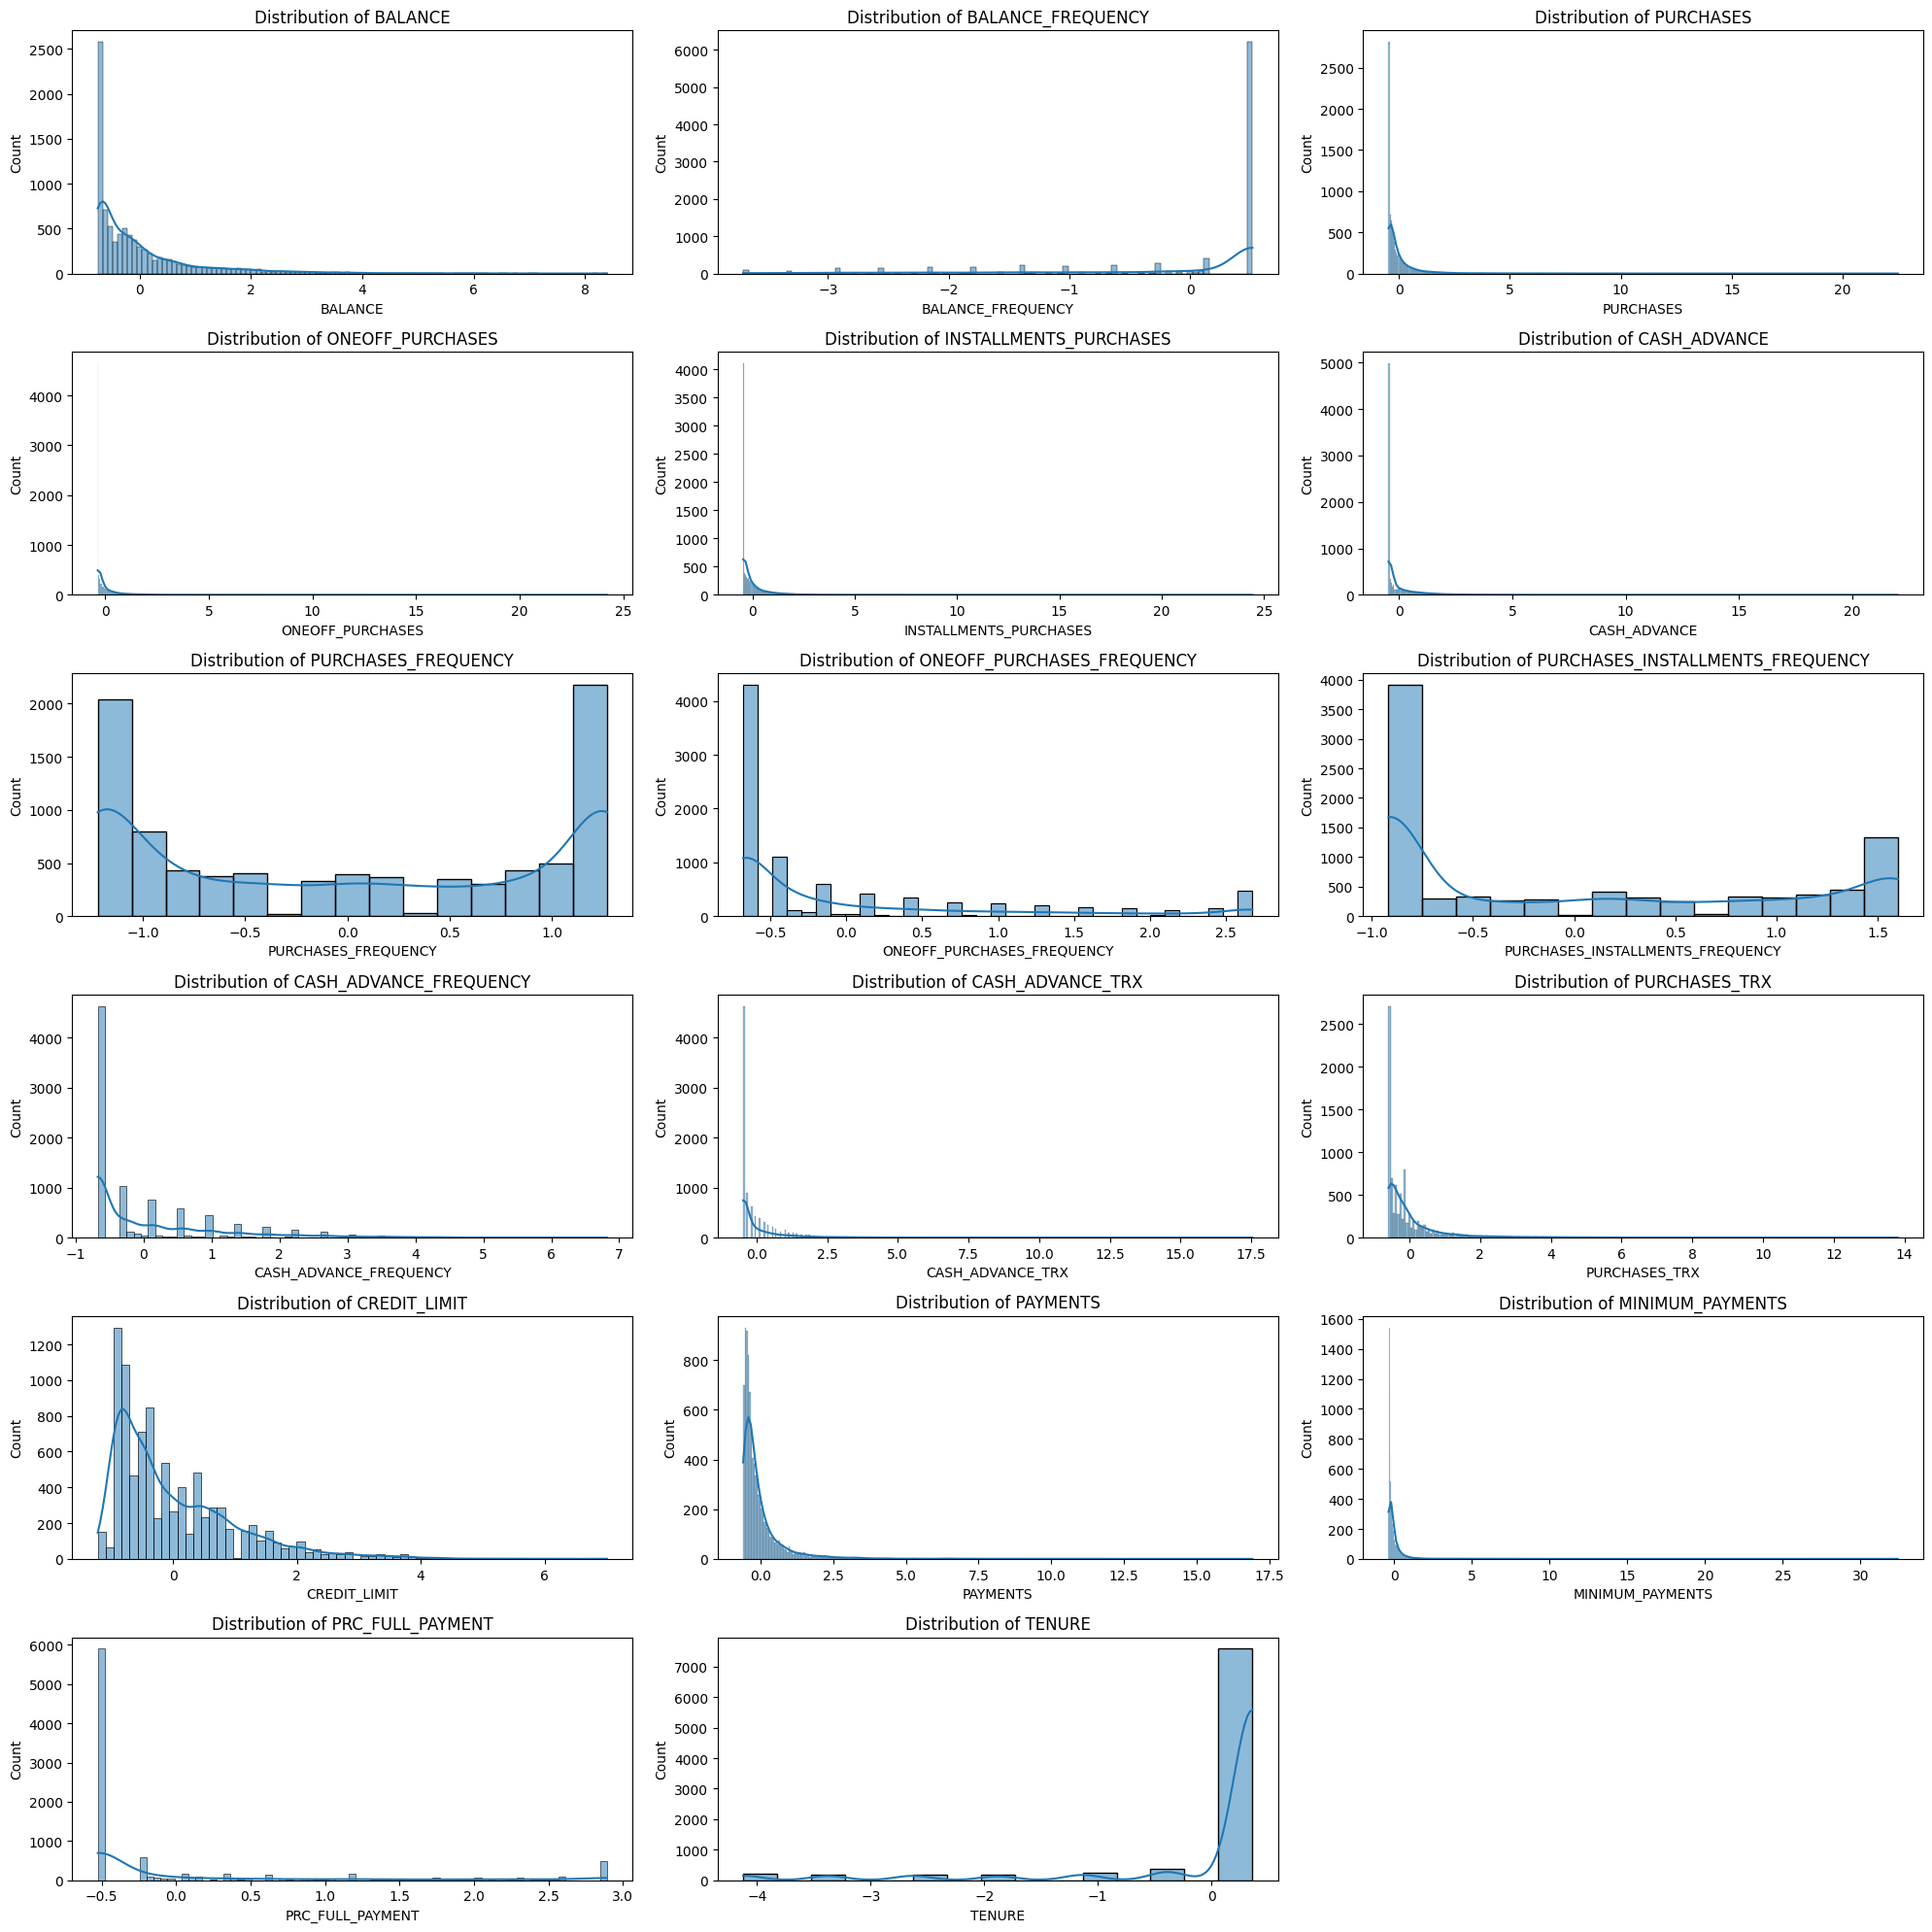

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

#visualize the distribution of each numerical feature 

plt.figure(figsize=(20, 20))
for i, column in enumerate(scaled_df.columns, 1):
    plt.subplot(6, 3, i)
    sns.histplot(scaled_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

Univariate Analysis Observations: 

- Skewed Distributions: Most features appear to be right-skewed, with a majority of customers showing lower credit limits and a minority with much higher limits and thus lower balances, purchases, payments and minimum payments. 
- ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES show extreme right-skewness, suggesting a small group of high spenders.
- Binary/Discrete-like Features: TENURE is concentrated at 12 months, indicating most customers are long-term. PRC_FULL_PAYMENT has many zeros, showing that many customers don’t fully pay their balances regularly.
- High Zero Counts: Features like CASH_ADVANCE_TRX and PURCHASES_INSTALLMENTS_FREQUENCY have many zeros, suggesting distinct customer groups who don’t use certain services.
- Outliers: Features like CASH_ADVANCE, PURCHASES, and PAYMENTS show long tails, possibly indicating high activity customers who may impact clustering.



Bivariate and Multivariate Analysis:

We will now explore relationships between features to understand how customers’ behavior in one area (e.g., CASH_ADVANCE) relates to another (e.g., BALANCE or PURCHASES). This will help us determine if certain variables are strongly correlated or if there are patterns that might hint at distinct customer segments.

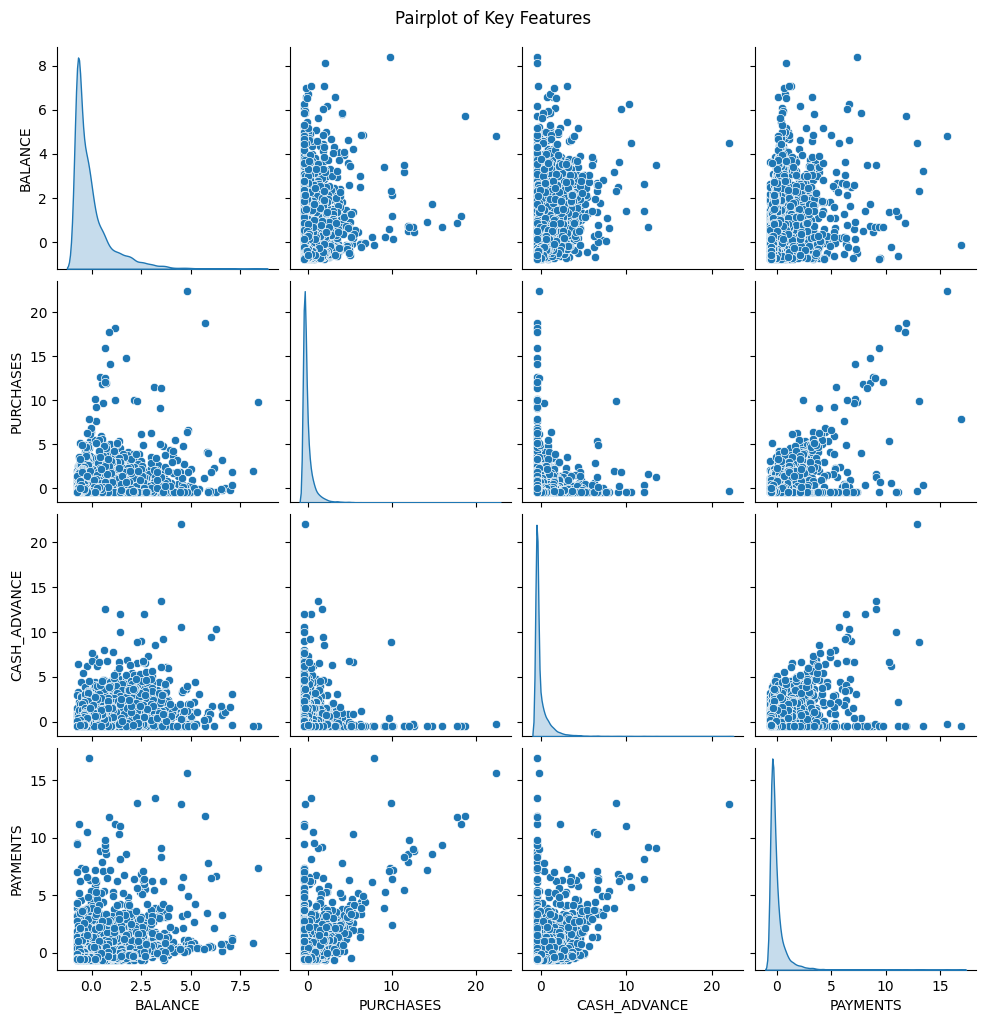

In [109]:
# Visualize relationships between key features
sns.pairplot(scaled_df[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS']], diag_kind='kde')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()


Bivariate and Multivariate Analysis Observations: 

BALANCE Relationships: 
- High BALANCE is positively associated with CASH_ADVANCE and PAYMENTS, indicating a segment of customers who maintain high balances, likely due to frequent repayments.
- There is a weak positive relationship between BALANCE and PURCHASES, suggesting diverse spending habits across balance levels.

CASH_ADVANCE and PURCHASES/PAYMENTS:
- Customers with high CASH_ADVANCE values also tend to make high PAYMENTS, possibly reflecting frequent repayment behavior.
- CASH_ADVANCE and PURCHASES show little correlation, indicating cash advances are independent of regular purchase habits.

PURCHASES vs. PAYMENTS:
- PURCHASES and PAYMENTS show a mild positive trend, with higher purchases associated with higher payments, possibly reflecting minimum or partial repayments.

Implications for Clustering:

Distinct Customer Segments: 

The varying relationships between BALANCE, CASH_ADVANCE, and PURCHASES suggest there could be distinct customer segments, such as:
- Customers with high balance and frequent cash advances.
- Customers with low balance and low purchasing or repayment patterns.
- High spenders with regular large payments.

Potential Features for Differentiation: 

The presence of correlations between BALANCE and CASH_ADVANCE and between PURCHASES and PAYMENTS suggests these features might be influential in forming clusters based on customer financial behaviors.

Correlation Analysis: 

The correlation matrix will help us see how features are correlated with each other. Strong correlations (positive or negative) between variables could highlight features that drive similar behavior, indicating potential segmentation criteria.

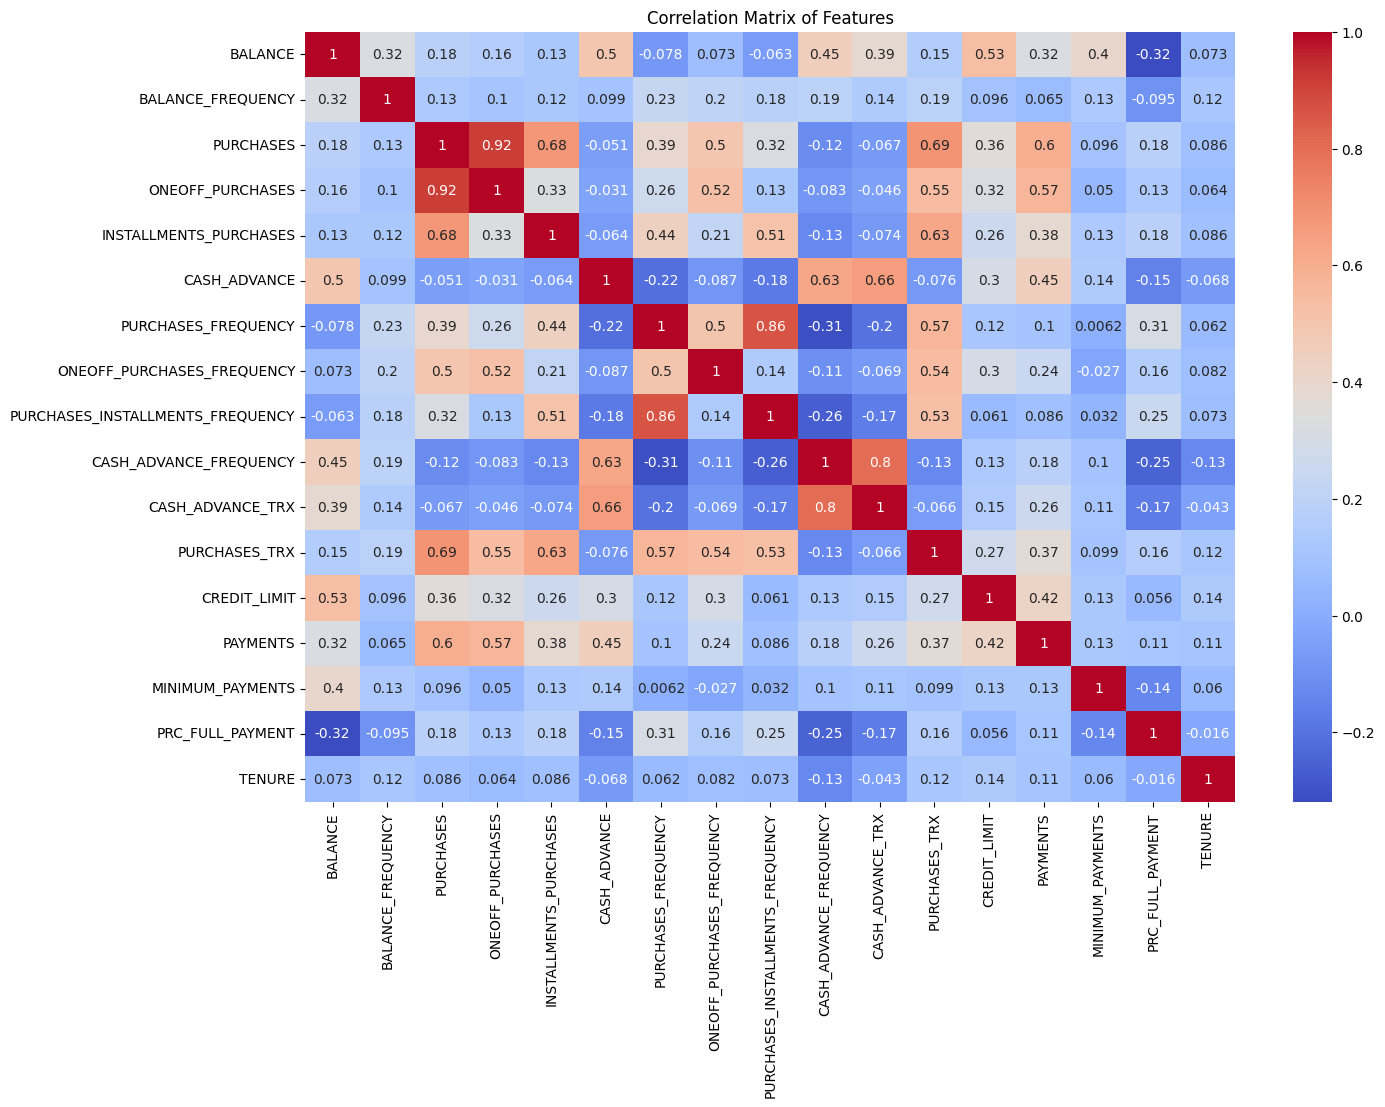

In [110]:
# Compute correlation matrix
corr_matrix = scaled_df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


Correlation Analysis Observations:

High Correlations:

PURCHASES is highly correlated with ONEOFF_PURCHASES (0.92) and INSTALLMENTS_PURCHASES (0.68), suggesting that total purchases are often driven by these two types.
PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY show a strong correlation (0.86), indicating that frequent buyers also tend to make installment purchases.

Moderate Correlations:

CREDIT_LIMIT shows moderate correlation with BALANCE (0.53), possibly indicating that higher credit limits are associated with higher balances.
CASH_ADVANCE and CASH_ADVANCE_TRX are correlated (0.66), as expected, given that more cash advances typically imply more transactions. 

Weak/No Correlation:

TENURE has low or near-zero correlations with most variables, meaning it does not strongly relate to spending or repayment behaviors.
Other variables, like PRC_FULL_PAYMENT, show low correlations, indicating limited predictive value for overall purchasing or balance trends.

Implications for Clustering:

Feature Selection: We could consider reducing redundancy by focusing on key correlated pairs. For example, using PURCHASES as a summary metric instead of ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES could simplify the dataset without much information loss.
Dimensionality Reduction (PCA): Applying PCA could help streamline the feature set, especially by combining highly correlated features into fewer components.



PCA: 

Since the data has already been standardized, our next step is to determine the number of components required to capture 90-95% of the variance and transform the data into these principal components. We will plot the explained variance to assess each component’s contribution, which will help us decide if dimensionality can be reduced without significant information loss. Once we identify the key components, we will interpret their relationship to the original features, aiding our understanding of the clustering results later on.

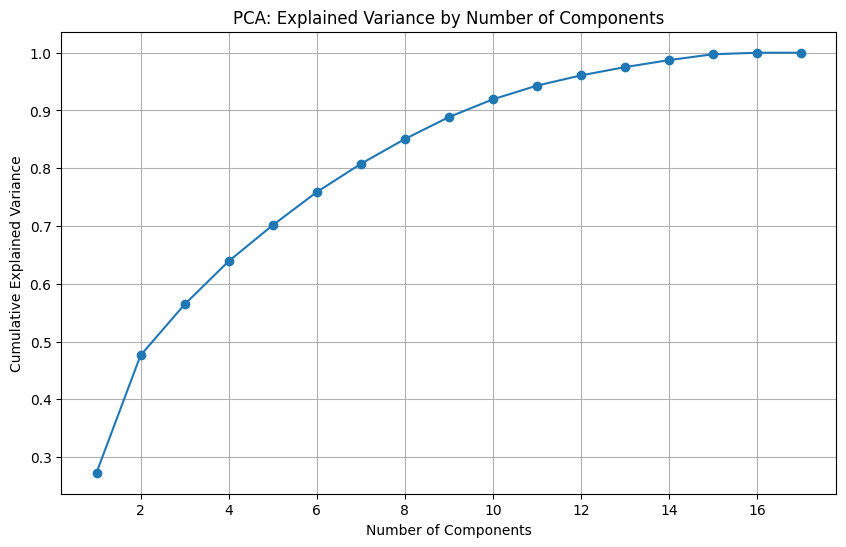

In [111]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA and fit it on the scaled data
pca = PCA()
pca.fit(scaled_df)

# Plot the explained variance ratio for each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance by Number of Components')
plt.grid(True)
plt.show()


Interpretation: 

From the cumulative explained variance plot, it looks like around 12 components would capture approximately 95% of the variance.

In [112]:
pca_optimal = PCA(n_components=10)
principal_components = pca_optimal.fit_transform(scaled_df)

# Convert to DataFrame for easier handling later
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Display the first few rows of PCA-transformed data
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.683649 -1.072241  0.475660  0.679928  0.043195  0.068069  0.822155   
1 -1.134085  2.509150  0.602216 -0.109542  0.662638 -1.102255 -0.384282   
2  0.969395 -0.383577  0.090970  1.238359 -2.166584 -0.320185 -1.542496   
3 -0.888220  0.004648  1.499800  1.075271  0.225828 -0.171540 -0.236644   
4 -1.600021 -0.683795  0.347927  1.013642 -0.453816  0.077004  0.698278   

        PC8       PC9      PC10  
0 -0.018952  0.118336 -0.078196  
1  0.176154  0.674472 -0.777929  
2 -0.229364 -0.867803 -0.001744  
3 -0.690410 -0.064245  0.393690  
4  0.245311  0.578032 -0.122073  


Clustering Algorithms

In [113]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [114]:
# Lists to store results
wcss = []
silhouette_scores = []

# Calculate WCSS and Silhouette Score for each k
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=42)
    kmeans.fit(pca_df)
    
    # Append WCSS (for Elbow Method)
    wcss.append(kmeans.inertia_)
    
    # Append Silhouette Score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(pca_df, labels))

Text(0, 0.5, 'WCSS')

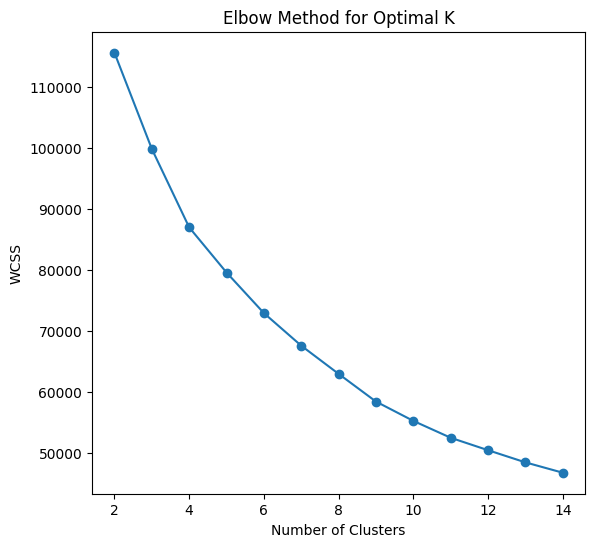

In [115]:
# Plot the Elbow Method
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

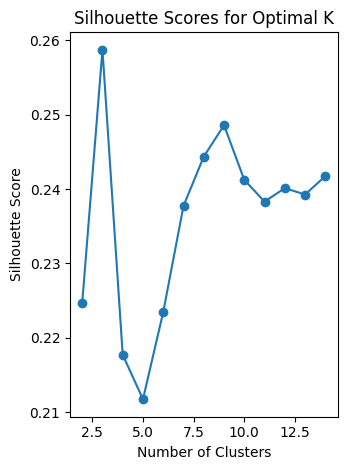

In [116]:
# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Analysis: 

1. Elbow Method: The elbow is somewhat visible around K = 4 or K = 5. After this point, the reduction in WCSS (within-cluster sum of squares) starts to diminish, indicating that adding more clusters provides less improvement in compactness.

- *Note on real-world data complexity: The WCSS steadily decreases without a clear elbow, making it a bit difficult to pinpoint an optimal K. This is typical for real-world datasets, where clusters often overlap.
Source: (https://builtin.com/data-science/elbow-method)

2. Silhouette Analysis: The Silhouette Score peaks at K=3, suggesting that 3 clusters may yield more distinct and well-separated clusters compared to other options. However, it’s followed closely by other values, such as K=7 and K=10, which might indicate different segmentation perspectives.

Conclusions for Next Step: 

The Silhouette Score measures how similar an object is to its own cluster compared to other clusters, which can sometimes be more insightful for real-world data with less pronounced "elbows." Since Silhouette Analysis indicates K=3 as the optimal number, this would be a strong candidate.

Now that we’ve determined K=3 as our optimal number of clusters, we will be using the silhouette score as a metric to evaluate and compare the performance of different clustering algorithms (K-Means, Hierarchical Clustering, and DBSCAN).

This will help us measure the quality of clusters formed by each algorithm for K=3.
By comparing silhouette scores across algorithms, we can assess which clustering approach performs best for this dataset with the given cluster number.

K-Means Clustering:

In [117]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=3, n_init=100, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_df)

# Calculate silhouette score for KMeans
kmeans_silhouette = silhouette_score(pca_df, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette)


K-Means Silhouette Score: 0.25872384735855014


Hierarchical Clustering:

In [118]:
from sklearn.cluster import AgglomerativeClustering

# Initialize and fit Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(pca_df)

# Calculate silhouette score for Hierarchical Clustering
hierarchical_silhouette = silhouette_score(pca_df, hierarchical_labels)
print("Hierarchical Clustering Silhouette Score:", hierarchical_silhouette)


Hierarchical Clustering Silhouette Score: 0.2511522819650942


DBSCAN (Density-Based Clustering):

In [119]:
from sklearn.cluster import DBSCAN

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_df)

# Calculate silhouette score for DBSCAN, excluding noise points (-1 labels)
dbscan_silhouette = silhouette_score(pca_df[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print("DBSCAN Silhouette Score (excluding noise):", dbscan_silhouette)


DBSCAN Silhouette Score (excluding noise): -0.3985454334894761


Analysis of Clustering Results:

K-Means: Works by minimizing the within-cluster sum of squares, which often performs well when clusters are compact and spherical.

Silhouette Score: ~0.259
This is the highest silhouette score among the three methods, indicating that K-Means has formed relatively well-separated and cohesive clusters compared to the other methods.

Hierarchical Clustering: Groups data points based on distance, building a hierarchy of clusters.

Silhouette Score: ~0.251
This is close to the K-Means score but slightly lower, indicating that hierarchical clustering did reasonably well but isn’t as effective as K-Means in separating the clusters.

DBSCAN: A density-based clustering method that identifies clusters as regions of high density separated by regions of lower density.

Silhouette Score: ~-0.399 (excluding noise)
A negative silhouette score generally implies that the clusters are poorly defined or that points are often closer to points in neighboring clusters than their own cluster. This suggests that DBSCAN might not be suitable for this dataset, likely due to its sensitivity to density parameters or the lack of a clear density-based structure in the data.

Based on these results, we have opted to select  K-Means as the most appropriate method for clustering this dataset.

In [121]:
# Add cluster labels to the original (non-scaled) data
df['Cluster'] = kmeans_labels

# Calculate mean values for each feature within each cluster
cluster_summary = df.groupby('Cluster').mean()


In [123]:
# Display the summary for interpretation
print(cluster_summary)

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0         798.758471           0.834962   503.130797        250.813237   
1        2224.159102           0.980996  4265.429541       2719.030483   
2        3979.493019           0.958421   379.781352        245.813348   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    252.638830    329.335142             0.465253   
1                   1546.882150    459.350616             0.947214   
2                    134.045394   3866.173512             0.231228   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.132079                          0.345722   
1                          0.666260                        

Cluster Visualization

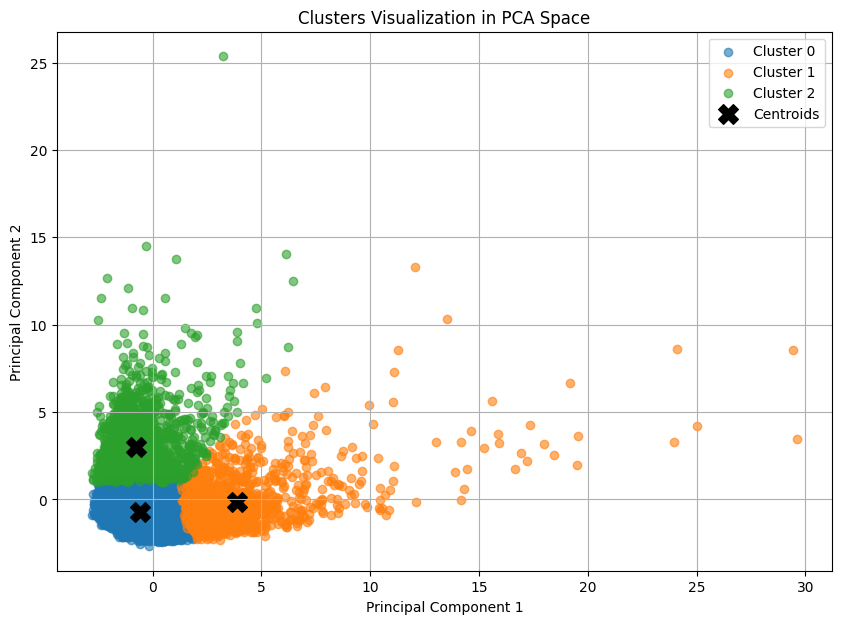

In [125]:
import matplotlib.pyplot as plt

# Plot the clusters based on the first two PCA components
plt.figure(figsize=(10, 7))

# Scatter plot for each cluster
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = pca_df[df['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}', alpha=0.6)

# Plot the centroids for K-Means
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

# Labeling and aesthetics
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization in PCA Space')
plt.legend()
plt.grid(True)
plt.show()


Interpreting Clusters 

PCA and Clustering: 

In the PCA process, we standardized the data to ensure that each feature contributed equally to the analysis, regardless of its original scale. Standardization was used to transform all features to have a mean of 0 and a standard deviation of 1, making each feature comparable in terms of influence.
The PCA components and clustering were thus computed on the scaled data, not on the raw values in the summary table. The values in the cluster summary are back in the original scale, providing meaningful, interpretable metrics for each cluster.

Analysis and Characterization of Clusters: 

We will begin with examining the cluster summary table (the mean values of each feature for each cluster), to identify how these clusters differ based on key features.

BALANCE:

- Cluster 0: Has the lowest average balance (~798), indicating this group likely represents lower spenders.
- Cluster 1: Moderate balance (~2224), suggesting medium-level spending behavior.
- Cluster 2: Highest balance (~3979), indicating high spenders or possibly credit-reliant customers.


PURCHASES:

- Cluster 0: Moderate average purchases (~503), suggesting moderate spending.
- Cluster 1: Highest average purchases (~4265), indicating high purchasing activity.
- Cluster 2: Lowest average purchases (~379), suggesting a conservative or cash-reliant spending pattern.

CASH_ADVANCE:

- Cluster 0: Low cash advance usage (~329), meaning few cash advances.
- Cluster 1: Moderate cash advance usage (~459).
- Cluster 2: Highest cash advance (~3866), indicating a reliance on cash advances.

PURCHASES_FREQUENCY and ONEOFF_PURCHASES_FREQUENCY:

- Cluster 0: Moderate purchasing frequency (~0.46) and low one-off purchases (~0.13).
- Cluster 1: Highest purchasing frequency (~0.95) and moderate one-off frequency (~0.66), indicating consistent spenders.
- Cluster 2: Low purchasing frequency (~0.23) and very low one-off purchases (~0.11), possibly occasional spenders or those limiting purchases.

CREDIT_LIMIT:

- Cluster 0: Moderate credit limit (~3266), possibly standard or average credit users.
- Cluster 1: Highest credit limit (~7738), indicating high creditworthiness or income.
- Cluster 2: Moderate limit (~6668) but high cash advance reliance, suggesting a credit-reliant group.

PRC_FULL_PAYMENT:

- Cluster 0: Moderate proportion of full payment (~0.155), indicating a reasonable level of full payment habits.
- Cluster 1: Highest proportion of full payment (~0.30), suggesting responsible or disciplined credit use.
- Cluster 2: Lowest proportion (~0.033), indicating that this group relies more on credit and pays less frequently in full.


Mapping the PCA Plot to Cluster Characteristics: 

In the PCA plot:

- Clusters are distributed in distinct regions, with centroid points representing the “center” of each cluster’s average feature values in the principal component space.
- Cluster 1 (orange) appears more spread out, which might suggest a diverse range of behaviors, consistent with its high balance and purchase levels.
- Cluster 2 (green) is more distinct and could indicate heavy cash advance use combined with low purchasing.
- Cluster 0 (blue) is tightly clustered around its center, suggesting more uniform behavior in spending and low reliance on credit.

Cluster Characterization Summary: 

Cluster 0:
- Characteristics: Relatively low balance, low cash advance usage, moderate purchases, moderate credit limit.
- Possible Profile: Likely represents low to moderate spenders with balanced spending habits and limited credit reliance.

Cluster 1:
- Characteristics: relatively moderate to higher balance, highest purchases, high credit limit, high proportion of full payments.
- Possible Profile: High-income, responsible spenders with access to substantial credit, who manage payments well.

Cluster 2:
- Characteristics: High cash advance, low purchases, lowest proportion of full payments.
- Possible Profile: Potentially credit-reliant customers who rely heavily on cash advances, possibly indicating financial strain or dependency on credit.

Actionable Insights

Based on the identified clusters and their characteristics, we will be providing targeted business recommendations for each segment. These insights will help in crafting business impact strategies that enhance customer engagement, improve credit utilization, and reduce risks.


Based on the identified clusters and their characteristics, here are targeted business recommendations for each segment. These insights will help in crafting strategies that enhance customer engagement, improve credit utilization, and reduce risks.

Cluster 0: Low Spenders with Moderate Credit Use

Characteristics: Low average balance, moderate purchases, low reliance on cash advances, moderate credit limit, and reasonable full payment habits.

Recommendations:

- Promote Credit Card Benefits: Encourage this segment to make greater use of their credit by promoting benefits such as cashback on essential categories (e.g., groceries, fuel) to increase spending and engagement.
- Offer Low-Interest Installment Plans: Since these customers have a moderate purchasing pattern, they may respond well to low-interest or interest-free installment plans on specific purchases (e.g., electronics or travel).
- Educational Campaign on Rewards: Launch an educational campaign highlighting how they can maximize rewards and build credit scores by utilizing credit responsibly, reinforcing their moderate payment habits.

Cluster 1: High Spenders with Responsible Credit Use

Characteristics: Moderate to High balance, high purchases, frequent usage, highest credit limit, and high proportion of full payments.

Recommendations:

- Premium Rewards Program: Given their high spending, consider offering exclusive benefits (e.g., premium rewards, travel perks, and cashback) to incentivize further spending and brand loyalty.
- Upgrade to Premium Credit Products: This group would benefit from premium products like platinum or black cards with additional benefits such as concierge services, travel insurance, and lounge access.
- Personalized Financial Planning Services: These customers show responsible credit habits, so offering financial advisory services could build stronger relationships and encourage higher-value investments or savings plans.
- Limit Increase Campaign: Since these customers frequently pay their balances in full, they may appreciate periodic credit limit increases, which could drive higher spending without increasing credit risk.

Cluster 2: High Credit-Reliant with Low Full Payments

Characteristics: High balance, low purchases, high cash advance reliance, moderate credit limit, and very low proportion of full payments.

Recommendations:

- Debt Consolidation and Management Programs: This group may be experiencing financial strain, so offering debt consolidation options or financial counseling services can help them manage their credit more effectively and reduce the risk of default.
- Flexible Payment Plans: Introduce flexible payment plans with reduced interest rates to encourage more regular payments and improve their financial stability.
- Credit Usage Alerts and Budgeting Tools: Providing real-time usage alerts, credit tracking, and budgeting tools could help this segment better manage their spending and avoid over-reliance on credit.
- Limit Cash Advance Usage: As this group heavily relies on cash advances, which often come with high fees, consider implementing strategies to discourage frequent cash advances (e.g., increased fees or usage limits) while promoting alternative credit options.


Overall Strategy: 

- Customer Education on Credit Health: Across all segments, an ongoing educational campaign focusing on responsible credit usage and financial health can improve customer satisfaction and reduce credit risk. This campaign could include workshops, email newsletters, and app notifications.
- Regular Credit Assessments: To reduce risk, perform regular assessments of credit behaviors, especially for customers with high balances and low payment rates, to proactively adjust credit terms or offer targeted support.
- Engage Through Digital Tools: Leverage the company’s app or website to provide each segment with targeted recommendations, reward updates, or spending insights. This can enhance user engagement and loyalty.
